In [2]:
import folium 
import pandas as pd
import json
import os
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 200)  # Adjust this number as needed
pd.set_option('display.max_columns', 50)  # Adjust this number as needed

In [9]:
school_holidays = pd.read_csv('D:\\event-llm\\data_CityEvent\\processed\\1.5.3_events_join_w_mobility\\non_attended_school-holidays_hourly_visits.csv')
print(school_holidays.shape)

(7880131, 8)


In [10]:
school_holidays[:3]

,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility
0,8suPhiirmZmpD7drSY,60530147002,POINT (-121.72502188091119 36.77977076378298),2021-12-18 03:00:00,2022-01-10 02:59:59,school-holidays,2021-12-18 03:00:00,1.0
1,8suPhiirmZmpD7drSY,60530147002,POINT (-121.72502188091119 36.77977076378298),2021-12-18 03:00:00,2022-01-10 02:59:59,school-holidays,2021-12-18 04:00:00,0.0
2,8suPhiirmZmpD7drSY,60530147002,POINT (-121.72502188091119 36.77977076378298),2021-12-18 03:00:00,2022-01-10 02:59:59,school-holidays,2021-12-18 05:00:00,0.0


In [11]:
school_holidays.EVENT_ID.nunique()

13027

In [12]:
school_holidays = school_holidays.drop_duplicates(subset='EVENT_ID', keep='first')

In [13]:
print(school_holidays.shape)

(13027, 8)


In [34]:
school_holidays[:2]

,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility
0,8suPhiirmZmpD7drSY,60530147002,POINT (-121.72502188091119 36.77977076378298),2021-12-18 03:00:00,2022-01-10 02:59:59,school-holidays,2021-12-18 03:00:00,1.0
553,HVCAsME5xnv9eFpkpF,60530113041,POINT (-120.92358477696635 36.16061152857111),2022-11-19 03:00:00,2022-11-28 02:59:59,school-holidays,2022-11-19 03:00:00,1.0


In [35]:
school_holidays['geometry'].nunique()

863

In [33]:
from shapely.geometry import Point, Polygon, MultiPolygon

def count_geometry_types(df):
    # Initialize counters
    point_count = 0
    polygon_count = 0
    multipolygon_count = 0

    # Loop through each geometry and count based on type
    for geom in df['geometry']:
        if isinstance(geom, Point):
            point_count += 1
        elif isinstance(geom, Polygon):
            polygon_count += 1
        elif isinstance(geom, MultiPolygon):
            multipolygon_count += 1

    return point_count, polygon_count, multipolygon_count

# Sample usage with your dataframe
# Assuming your dataframe is 'df'
point_count, polygon_count, multipolygon_count = count_geometry_types(school_holidays)

print(f"Points: {point_count}")
print(f"Polygons: {polygon_count}")
print(f"MultiPolygons: {multipolygon_count}")


Points: 0
Polygons: 0
MultiPolygons: 0


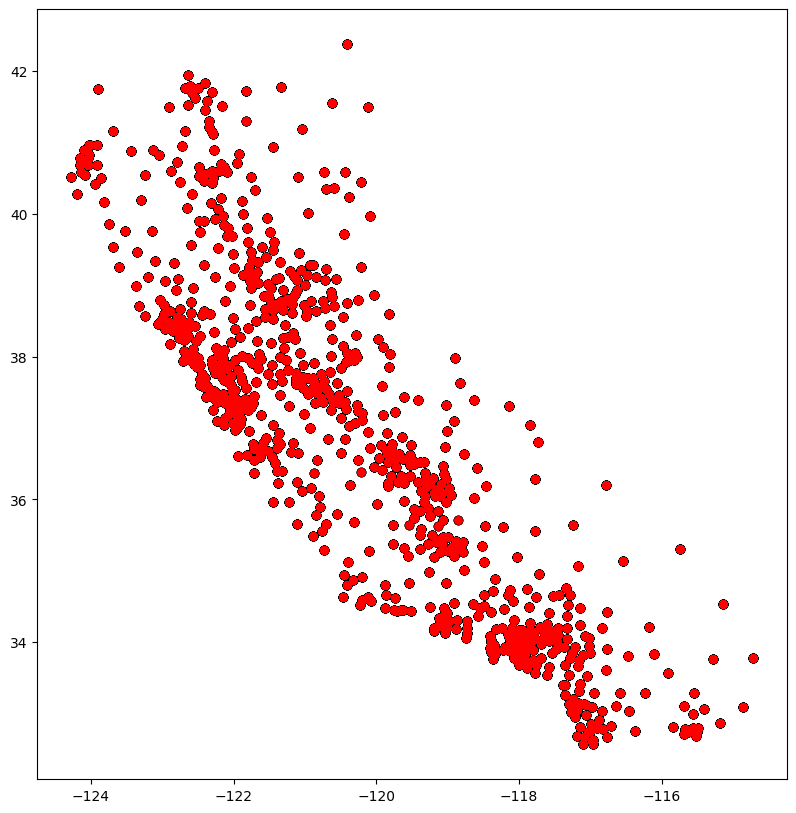

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon

def plot_geometry(df):
    # Convert the 'geometry' column to GeoSeries if not already a GeoSeries
    gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))
    
    # Plot the geometries using GeoPandas built-in plotting
    ax = gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')
    
    
    plt.show()

# Sample usage with your dataframe
# Assuming you have your dataframe 'df'
plot_geometry(school_holidays)
